In [153]:
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 12.0)


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [154]:
dados = pd.read_csv('DADOS_2020 (Dados com DATAS CONTINUAS).csv', header=None)
dados

,0,1,2,3,4,5,6,7,8,9
0,-0.335,-0.535,-0.780,-0.767,17,10,2019,13,1,50
1,-0.338,-0.541,-0.791,-0.787,17,10,2019,13,2,0
2,-0.366,-0.549,-0.823,-0.824,17,10,2019,13,3,0
3,-0.479,-0.572,-0.833,-0.831,17,10,2019,13,4,0
4,-0.557,-0.648,-0.836,-0.836,17,10,2019,13,5,0
...,...,...,...,...,...,...,...,...,...,...
119175,-0.897,-0.577,-0.672,-0.587,11,1,2020,16,48,0
119176,-0.900,-0.650,-0.846,-0.594,11,1,2020,16,49,0
119177,-0.898,-0.629,-0.812,-0.590,11,1,2020,16,50,0
119178,-0.898,-0.626,-0.842,-0.592,11,1,2020,16,51,0


### Tratamento dos dados 

In [155]:
dados = dados.iloc[:,0:10]

dias = []
horas = []
#print(dados[4][0])



for i in range(0, len(dados)):
    #Modelo: 2017-01-01 05:03 
    dias.append("%d-%d-%d" %(dados[6][i], dados[5][i], 
                 dados[4][i]))
    horas.append(("%d-%d-%d %d:%d:%d" %(dados[6][i], dados[5][i], 
                 dados[4][i], dados[7][i], dados[8][i], dados[9][i])))
                
    
dados = dados.iloc[:, 0:4]
horario = pd.to_datetime(horas)
dados = dados.join(pd.DataFrame(horario), how='outer', rsuffix=' ')
dados.columns = ['Solução 1', 'Solução 2', 'Solução 3', 'Solução 4', 'Horario']
dados = dados.set_index('Horario')

horario


DatetimeIndex(['2019-10-17 13:01:50', '2019-10-17 13:02:00',
               '2019-10-17 13:03:00', '2019-10-17 13:04:00',
               '2019-10-17 13:05:00', '2019-10-17 13:06:00',
               '2019-10-17 13:07:00', '2019-10-17 13:08:00',
               '2019-10-17 13:09:00', '2019-10-17 13:10:00',
               ...
               '2020-01-11 16:43:00', '2020-01-11 16:44:00',
               '2020-01-11 16:45:00', '2020-01-11 16:46:00',
               '2020-01-11 16:47:00', '2020-01-11 16:48:00',
               '2020-01-11 16:49:00', '2020-01-11 16:50:00',
               '2020-01-11 16:51:00', '2020-01-11 16:52:00'],
              dtype='datetime64[ns]', length=119180, freq=None)

In [156]:
for day in dados.index.drop_duplicates():
    if "2021" in str(day):
        print(day)


In [157]:
def geraGrafico(nomeX, titulo, solucao, dadosmin, dadosmax, 
                limY_inf=0, limY_sup=2.5, minutos=1, cor='red'):
    solucao = solucao.iloc[range(dadosmin, dadosmax, minutos)] 
    plt.title(titulo, fontsize=14)
    plt.xlabel(nomeX, fontsize=14)
    plt.ylabel("Potential difference in Volts", fontsize=14)
    
    plt.ylim(limY_inf, limY_sup)
    plt.grid(True, linewidth=1)
    #plt.gcf().autofmt_xdate()
    plt.plot(solucao, color=cor)

In [158]:
def FiltraPositivo(serie):
    Serie = []
    for elemento in serie:
        if(elemento > 0.00):
            Serie.append( -elemento )
        else:
            Serie.append( elemento )
    
    Serie = pd.Series(Serie, index=serie.index)
    return Serie

### Filtrando os dados

In [159]:
solucao1 = dados.iloc[:, 0].dropna()
solucao1 = solucao1[(solucao1 >= -1.1) & (solucao1 <= 0.0)] 

solucao2 = dados.iloc[:, 1].dropna()
solucao2 = solucao2[(solucao2 >= -1.1) & (solucao2 <= 0.0)] 

solucao3 = dados.iloc[:, 2].dropna()
solucao3 = solucao3[(solucao3 >= -1.1) & (solucao3 <= 0.0)] 

solucao4 = dados.iloc[:, 3].dropna()
solucao4 = solucao4[(solucao4 >= -0.7) & (solucao4 <= 0.0)] 


solucao1 = -0.9484 - solucao1
solucao2 = solucao2 + 0.2518
solucao3 = -0.9484 - solucao3
solucao4 = solucao4 + 0.2518

solucao1 = FiltraPositivo(solucao1)
FiltraPositivo(solucao2)
FiltraPositivo(solucao3)
FiltraPositivo(solucao4)


Horario
2019-10-17 13:23:00   -0.3392
2019-10-17 13:24:00   -0.3442
2019-10-17 13:25:00   -0.3482
2019-10-17 13:26:00   -0.3492
2019-10-17 13:27:00   -0.3482
                        ...  
2020-01-11 16:48:00   -0.3352
2020-01-11 16:49:00   -0.3422
2020-01-11 16:50:00   -0.3382
2020-01-11 16:51:00   -0.3402
2020-01-11 16:52:00   -0.3302
Length: 116376, dtype: float64

### Transformando as Datas

### Dados não filtrados

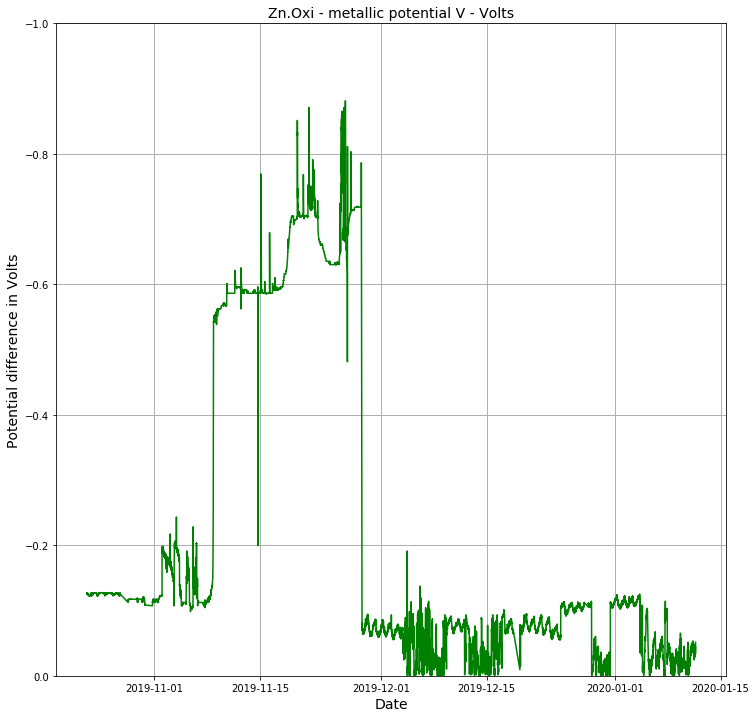

In [175]:
geraGrafico("Date", "Zn.Oxi - metallic potential V - Volts", solucao1, 7420, len(solucao1), 0, -1, 10, cor='green')


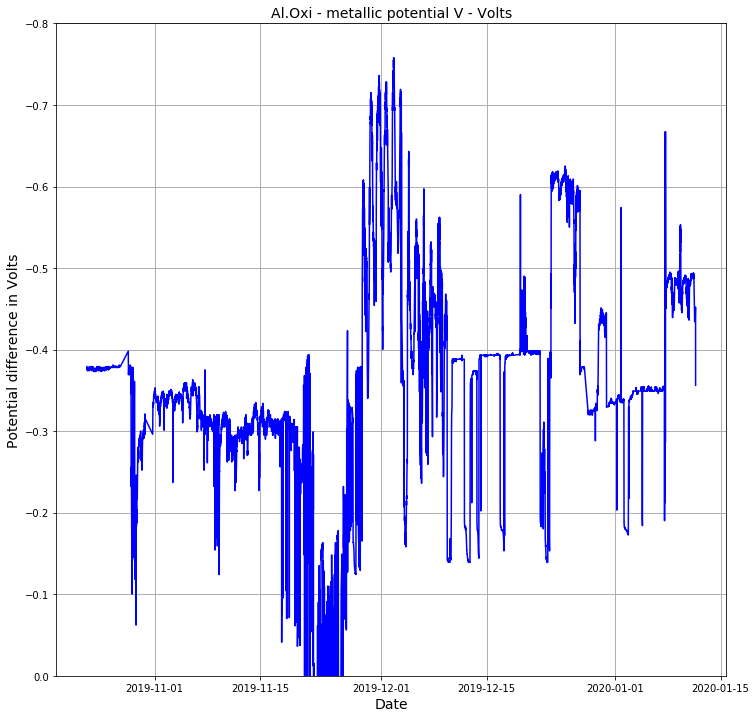

In [161]:
geraGrafico("Date", "Al.Oxi - metallic potential V - Volts",solucao2, 7420, len(solucao2),
            0, -0.8, 10, 'blue')

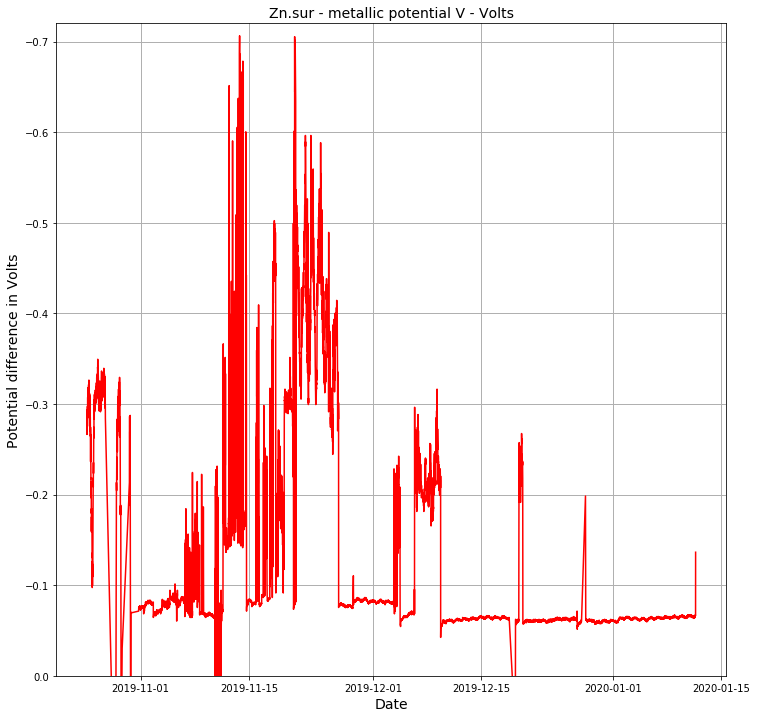

In [162]:
geraGrafico("Date", "Zn.sur - metallic potential V - Volts", solucao3, 7420, len(solucao3), 0, -0.72, 10, 'red')

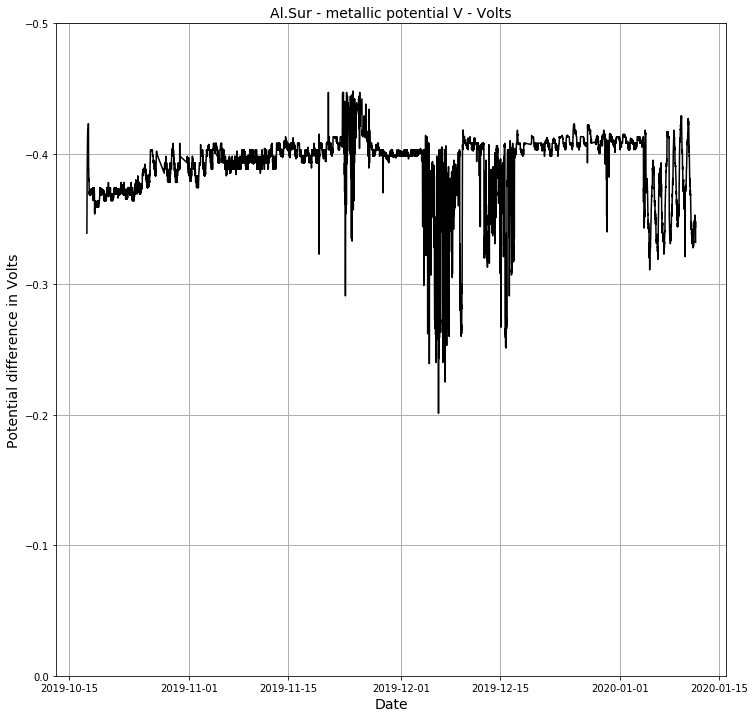

In [163]:
geraGrafico("Date", "Al.Sur - metallic potential V - Volts",solucao4, 0, len(solucao4), 0, -0.5, 10, 'black')

### Dados Filtrados

In [188]:
Solucao1Filtrada = solucao1.rolling(window=1000).mean()
Solucao1Filtrada.count()

117506

In [189]:
Solucao2Filtrada = solucao2.rolling(window=1000).mean()
print(Solucao2Filtrada.count())
Solucao2Filtrada = Solucao2Filtrada[Solucao2Filtrada > -0.62]

117548


In [190]:
Solucao3Filtrada = solucao3.rolling(window=1000).mean()
print(Solucao3Filtrada.count())
Solucao3Filtrada = Solucao3Filtrada[Solucao3Filtrada > -0.35]

112294


In [191]:
Solucao4Filtrada = solucao4.rolling(window=1000).mean()
Solucao4Filtrada.count

<bound method Series.count of Horario
2019-10-17 13:23:00         NaN
2019-10-17 13:24:00         NaN
2019-10-17 13:25:00         NaN
2019-10-17 13:26:00         NaN
2019-10-17 13:27:00         NaN
                         ...   
2020-01-11 16:48:00   -0.341267
2020-01-11 16:49:00   -0.341247
2020-01-11 16:50:00   -0.341225
2020-01-11 16:51:00   -0.341203
2020-01-11 16:52:00   -0.341171
Name: Solução 4, Length: 116376, dtype: float64>

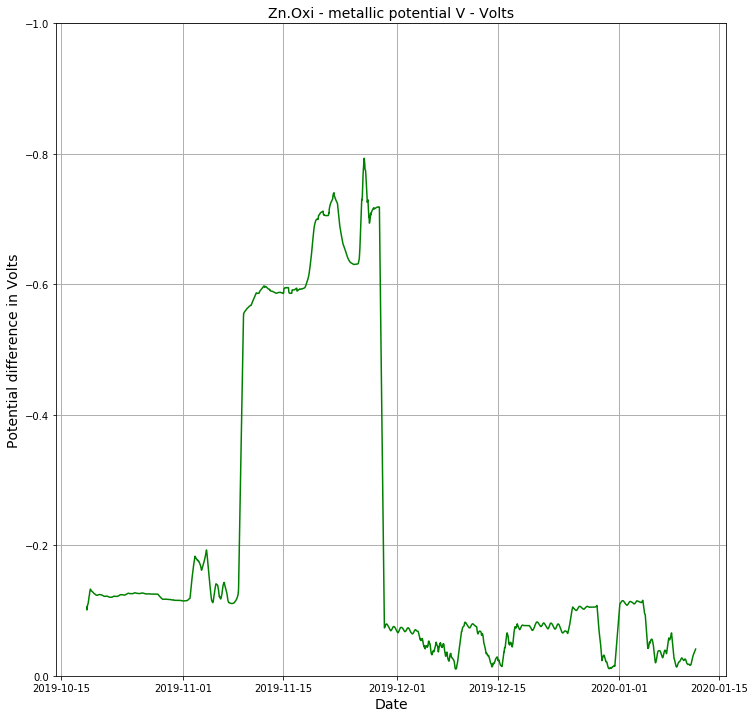

In [192]:
geraGrafico("Date", "Zn.Oxi - metallic potential V - Volts", Solucao1Filtrada, 700, len(Solucao1Filtrada), 0, -1, 10, cor='green')

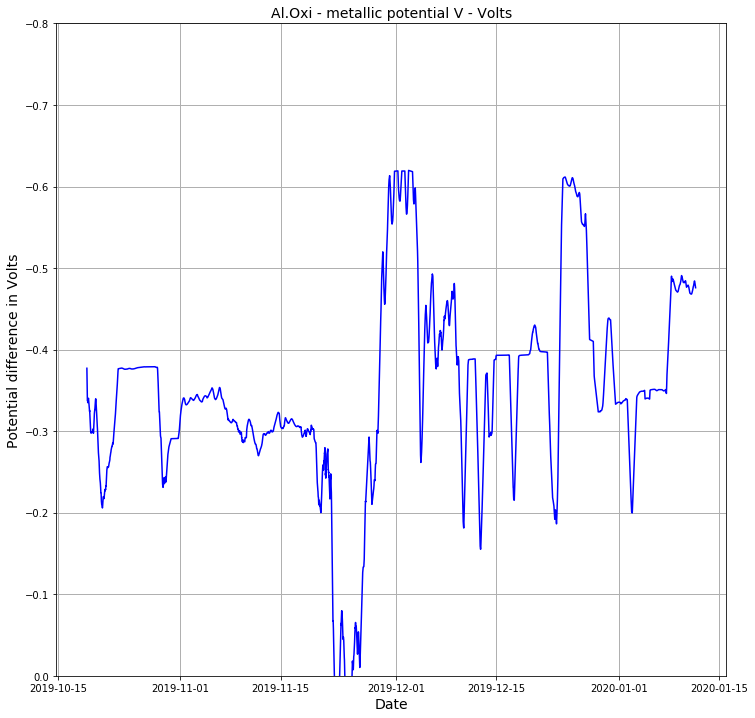

In [193]:
geraGrafico("Date", "Al.Oxi - metallic potential V - Volts",Solucao2Filtrada, 700, len(Solucao2Filtrada),
            0, -0.8, 10, 'blue')

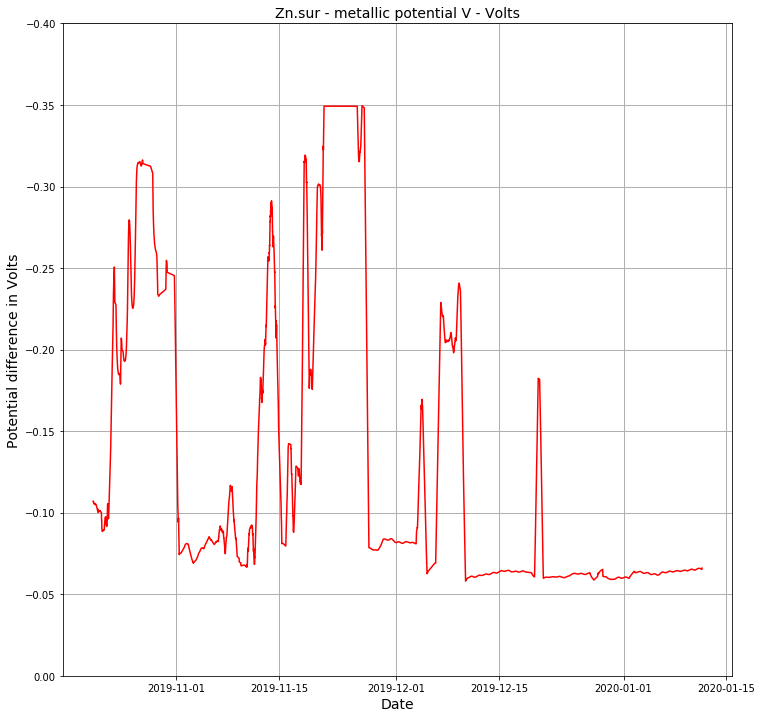

In [194]:
geraGrafico("Date", "Zn.sur - metallic potential V - Volts", Solucao3Filtrada, 700, len(Solucao3Filtrada), 0, -0.4, 10, 'red')

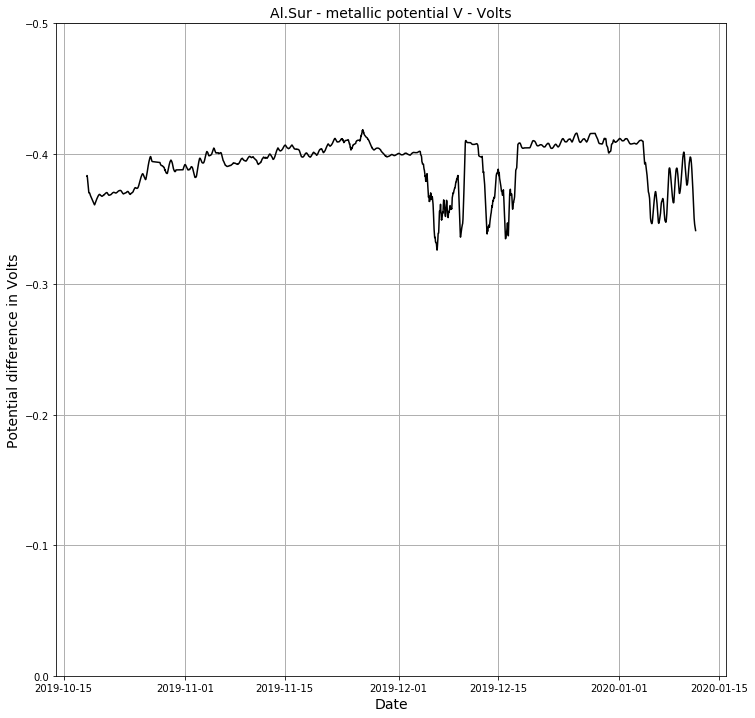

In [195]:
geraGrafico("Date", "Al.Sur - metallic potential V - Volts",Solucao4Filtrada, 0, len(Solucao4Filtrada), 0, -0.5, 10, 'black')

### Dias de captura dos dados

In [199]:
horario

DatetimeIndex(['2019-10-17 13:01:50', '2019-10-17 13:02:00',
               '2019-10-17 13:03:00', '2019-10-17 13:04:00',
               '2019-10-17 13:05:00', '2019-10-17 13:06:00',
               '2019-10-17 13:07:00', '2019-10-17 13:08:00',
               '2019-10-17 13:09:00', '2019-10-17 13:10:00',
               ...
               '2020-01-11 16:43:00', '2020-01-11 16:44:00',
               '2020-01-11 16:45:00', '2020-01-11 16:46:00',
               '2020-01-11 16:47:00', '2020-01-11 16:48:00',
               '2020-01-11 16:49:00', '2020-01-11 16:50:00',
               '2020-01-11 16:51:00', '2020-01-11 16:52:00'],
              dtype='datetime64[ns]', length=119180, freq=None)

In [197]:
CSV = pd.DataFrame(Solucao1Filtrada, columns=["Solucao 1"])
CSV = CSV.join(pd.DataFrame(Solucao2Filtrada), how='outer', rsuffix=' ')
CSV = CSV.join(pd.DataFrame(Solucao3Filtrada), how='outer', rsuffix=' ')
CSV = CSV.join(pd.DataFrame(Solucao4Filtrada), how='outer', rsuffix=' ')
CSV = CSV.dropna()
CSV

,Solucao 1,Solução 2,Solução 3,Solução 4
Horario,,,,
2019-10-18 14:04:00,-0.105840,-0.611813,-0.106549,-0.370065
2019-10-18 14:05:00,-0.105358,-0.611748,-0.106560,-0.370070
2019-10-18 14:06:00,-0.104880,-0.611683,-0.106573,-0.370073
2019-10-18 14:07:00,-0.104430,-0.611339,-0.106583,-0.370076
2019-10-18 14:08:00,-0.104093,-0.611306,-0.106595,-0.370080
...,...,...,...,...
2020-01-11 16:48:00,-0.040951,-0.475781,-0.066014,-0.341267
2020-01-11 16:49:00,-0.040976,-0.475697,-0.066050,-0.341247
2020-01-11 16:50:00,-0.041003,-0.475593,-0.066119,-0.341225


In [200]:
CSV.to_csv("Dados 2020 Márcia FILTRADOS")